In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

1. Import the raw data set into a Pandas DataFrame.

In [2]:
animals = pd.read_csv("2021-11-ml-09-k-means-animals-dataset.csv")
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


2. Follow the steps in the lesson to prepare the data set for K-means clustering.

In [3]:
animals.isnull().sum()

Region                   0
Stage                    0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Nearly all comments are null so lets remove that column

In [4]:
animals = animals.drop("Comments", axis=1)

If rows have over 50% of their data missing lets remove them.

In [5]:
print("Before:", animals.shape[0])
min_count = 0.5* animals.shape[1]
animals = animals.dropna(axis=0, thresh = min_count)
print("After:", animals.shape[0])
animals.info()


Before: 344
After: 342
<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               342 non-null    object 
 1   Stage                342 non-null    object 
 2   Individual ID        342 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(3)
memory usage: 26.7+ KB


Check for outliers

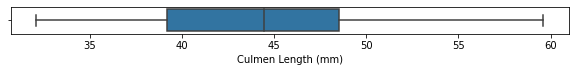

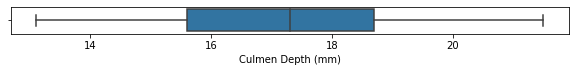

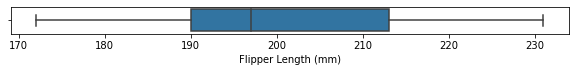

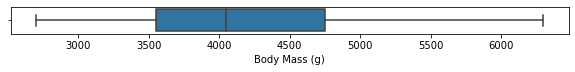

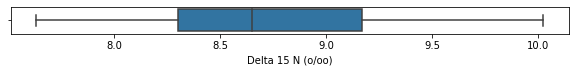

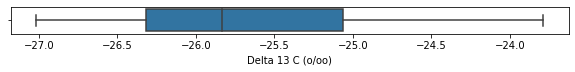

In [6]:
# outlier detection
animals_numerical =animals.select_dtypes(exclude=['object'])
for column in animals_numerical:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(data=animals_numerical, x=column)

Impute data for null values

In [7]:
imputer_continuos = SimpleImputer(missing_values=np.nan, strategy="mean")

animals["Delta 15 N (o/oo)"] = imputer_continuos.fit_transform(animals["Delta 15 N (o/oo)"].values.reshape(-1,1))[:,0]
animals["Delta 13 C (o/oo)"] = imputer_continuos.fit_transform(animals["Delta 13 C (o/oo)"].values.reshape(-1,1))[:,0]
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               342 non-null    object 
 1   Stage                342 non-null    object 
 2   Individual ID        342 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    342 non-null    float64
 8   Delta 13 C (o/oo)    342 non-null    float64
dtypes: float64(6), object(3)
memory usage: 26.7+ KB


As Individual ID is a identifier of an animal we should remove it when douing any machine learning. Lets now look at the other two categorical columns unique identifiers to see if we should include them as dummy columns or remove them in total.

In [8]:
print(animals["Region"].unique())
print(animals["Stage"].unique())

['Anvers']
['Adult, 1 Egg Stage']


Let's remove these columns based on our findings.

In [9]:
animals = animals.drop(["Region", "Stage", "Individual ID"] , axis=1)

In [10]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   342 non-null    float64
 1   Culmen Depth (mm)    342 non-null    float64
 2   Flipper Length (mm)  342 non-null    float64
 3   Body Mass (g)        342 non-null    float64
 4   Delta 15 N (o/oo)    342 non-null    float64
 5   Delta 13 C (o/oo)    342 non-null    float64
dtypes: float64(6)
memory usage: 18.7 KB


3. Create a model for each value of K from 2 through 5, inclusive. Create a scatterplot for each model, using color to distinguish between clusters.

In [11]:
kmeans_list = []
for i in range(2,40):
    kmeans = KMeans(n_clusters=i, random_state=0)
    label = kmeans.fit_predict(animals)
    kmeans_list.append((i, kmeans, label))

Number of clusters: 2


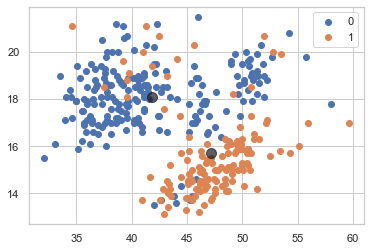

Number of clusters: 3


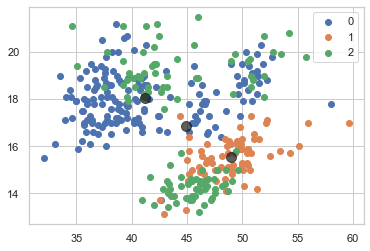

Number of clusters: 4


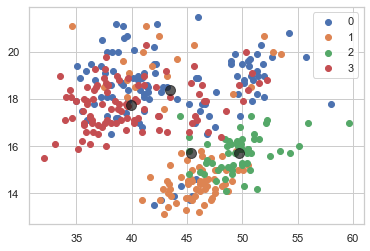

Number of clusters: 5


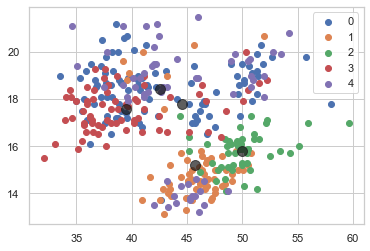

In [12]:
sns.set_theme(style="whitegrid")
for label_km in kmeans_list[:4]:
    cluster = label_km[0]
    kmeans = label_km[1]
    label = label_km[2]
    #Getting unique labels
    u_labels = np.unique(label)
    centroids = kmeans.cluster_centers_

    #plotting the results:
    print(f"Number of clusters: {cluster}")
    for i in u_labels:
        plt.scatter(animals.iloc[label == i , 0] , animals.iloc[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k', alpha=0.7)
    plt.legend()
    plt.show()

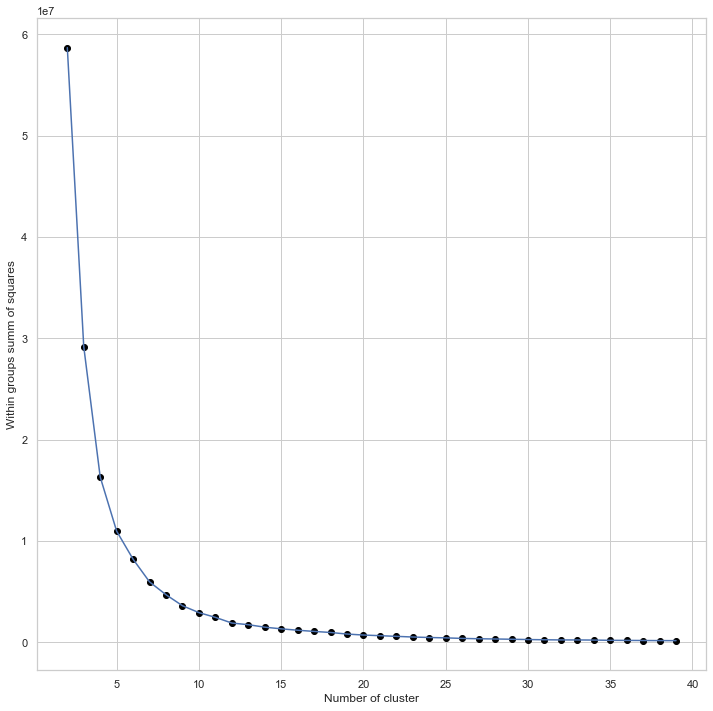

In [13]:
capture_accuracy = {}
for k in kmeans_list:
    cluster = k[0]
    kmeans = k[1]
    label = k[2]
    #print(data["clusters"])
    capture_accuracy[cluster] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(12,12))
plt.plot(list(capture_accuracy.keys()), list(capture_accuracy.values()))
plt.scatter(list(capture_accuracy.keys()), list(capture_accuracy.values()), color='black')
plt.xlabel("Number of cluster")
plt.ylabel("Within groups summ of squares")
plt.show()

It seems that the elbow of the scree plot is around 5-7 clusters. For ease of implementation 5 clusters would likely be easiert to use, however for slightly better results 7 clusters can be used. After 7 clusters the Kmeans algorithm mostly levels out.